# Copyright 2020 Google LLC.
 Licensed under the Apache License, Version 2.0 (the "License");
 you may not use this file except in compliance with the License.
 You may obtain a copy of the License at

 https://www.apache.org/licenses/LICENSE-2.0

 Unless required by applicable law or agreed to in writing, software
 distributed under the License is distributed on an "AS IS" BASIS,
 WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
 See the License for the specific language governing permissions and
 limitations under the License.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [2]:
# Load the datasets from the internet
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

In [3]:
# The following code cell scales the median_house_value
scale_factor = 1000.0

# Scale the training set's label.
train_df["median_house_value"] /= scale_factor 

# Scale the test set's label
test_df["median_house_value"] /= scale_factor

In [8]:
# Define the functions that build and train a model
def build_model(my_learning_rate):
    """Create and compile a simple linear regression model."""
    # Most simple tf.keras models are sequential.
    model = tf.keras.models.Sequential()

    # Add one linear layer to the model to yield a simple linear regressor.
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

    # Compile the model topography into code that TensorFlow can efficiently
    # execute. Configure training to minimize the model's mean squared error. 
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

    return model               


def train_model(model, df, feature, label, my_epochs, 
            my_batch_size=None, my_validation_split=0.1):
    """Feed a dataset into the model in order to train it."""

    history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=my_batch_size,
                      epochs=my_epochs,
                      validation_split=my_validation_split)

    # Gather the model's trained weight and bias.
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]

    # The list of epochs is stored separately from the 
    # rest of history.
    epochs = history.epoch

    # Isolate the root mean squared error for each epoch.
    hist = pd.DataFrame(history.history)
    rmse = hist["root_mean_squared_error"]

    return epochs, rmse, history.history   

print("Defined the build_model and train_model functions.")

Defined the build_model and train_model functions.


In [5]:
# Define the plotting function

def plot_the_loss_curve(epochs, mae_training, mae_validation):
    """Plot a curve of loss vs. epoch."""

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")

    plt.plot(epochs[1:], mae_training[1:], label="Training Loss")
    plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
    plt.legend()

    # We're not going to plot the first epoch, since the loss on the first epoch
    # is often substantially greater than the loss for other epochs.
    merged_mae_lists = mae_training[1:] + mae_validation[1:]
    highest_loss = max(merged_mae_lists)
    lowest_loss = min(merged_mae_lists)
    delta = highest_loss - lowest_loss
    print(delta)

    top_of_y_axis = highest_loss + (delta * 0.05)
    bottom_of_y_axis = lowest_loss - (delta * 0.05)

    plt.ylim([bottom_of_y_axis, top_of_y_axis])
    plt.show()  

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


# First trial

/home/sang/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/30
136/136 [==============================] - 0s 934us/step - loss: 38984.0508 - root_mean_squared_error: 197.4438 - val_loss: 47299.9766 - val_root_mean_squared_error: 217.4856
Epoch 2/30
136/136 [==============================] - 0s 501us/step - loss: 22372.6914 - root_mean_squared_error: 149.5750 - val_loss: 27534.7793 - val_root_mean_squared_error: 165.9361
Epoch 3/30
136/136 [==============================] - 0s 482us/step - loss: 11872.3799 - root_mean_squared_error: 108.9604 - val_loss: 14948.1592 - val_root_mean_squared_error: 122.2627
Epoch 4/30
136/136 [==============================] - 0s 451us/step - loss: 7150.6484 - root_mean_squared_error: 84.5615 - val_loss: 9487.8164 - val_root_mean_squared_error: 97.4054
Epoch 5/30
136/136 [==============================] - 0s 474us/step - loss: 6515.2275 - root_mean_squared_error: 80.7170 - val_loss: 9337.4648 - val_root_mean_squared_error: 96.6306
Epoch 6/30
136/136 [==============================] - 0s 462us/step - loss: 65

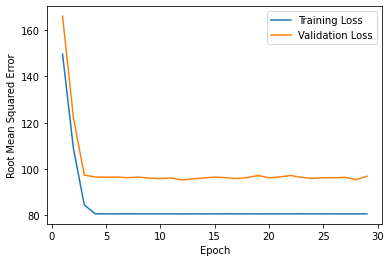

In [6]:
# In the following code cell, you'll see a variable named validation_split
# The following variables are the hyperparameters.
learning_rate = 0.08
epochs = 30
batch_size = 100

# Split the original training set into a reduced training set and a
# validation set. 
validation_split = 0.2

# Identify the feature and the label.
my_feature = "median_income"    # the median income on a specific city block.
my_label = "median_house_value" # the median house value on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on the neighborhood's median income.  

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions to build and train the model.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, train_df, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])

# Determine why the loss curves differ

In [7]:
# Examine examples 0 through 4 and examples 25 through 29
# of the training set
train_df.head(n=1000)

# The original training set is sorted by longitude. 
# Apparently, longitude influences the relationship of
# total_rooms to median_house_value.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5
...,...,...,...,...,...,...,...,...,...
995,-117.1,32.5,8.0,6533.0,1217.0,4797.0,1177.0,4.0,144.4
996,-117.1,34.6,6.0,5110.0,1044.0,1938.0,724.0,3.2,112.8
997,-117.1,34.2,22.0,4397.0,931.0,1145.0,445.0,4.5,108.4
998,-117.1,34.0,24.0,4144.0,826.0,2127.0,772.0,2.5,96.0


To fix the problem, shuffle the examples in the training set before splitting the examples into a training set and validation set. To do so, take the following steps:

Shuffle the data in the training set by adding the following line anywhere before you call train_model

Pass shuffled_train_df (instead of train_df) as the second argument to train_model

Epoch 1/70
136/136 [==============================] - 0s 765us/step - loss: 45587.3945 - root_mean_squared_error: 213.5121 - val_loss: 33160.3008 - val_root_mean_squared_error: 182.0997
Epoch 2/70
136/136 [==============================] - 0s 465us/step - loss: 26953.3066 - root_mean_squared_error: 164.1746 - val_loss: 18450.9805 - val_root_mean_squared_error: 135.8344
Epoch 3/70
136/136 [==============================] - 0s 474us/step - loss: 14566.9648 - root_mean_squared_error: 120.6937 - val_loss: 9702.8457 - val_root_mean_squared_error: 98.5030
Epoch 4/70
136/136 [==============================] - 0s 531us/step - loss: 8319.4189 - root_mean_squared_error: 91.2108 - val_loss: 6753.5356 - val_root_mean_squared_error: 82.1799
Epoch 5/70
136/136 [==============================] - 0s 494us/step - loss: 7099.1616 - root_mean_squared_error: 84.2565 - val_loss: 6709.1519 - val_root_mean_squared_error: 81.9094
Epoch 6/70
136/136 [==============================] - 0s 470us/step - loss: 7091

Epoch 46/70
136/136 [==============================] - 0s 419us/step - loss: 7090.5054 - root_mean_squared_error: 84.2051 - val_loss: 6704.7681 - val_root_mean_squared_error: 81.8826
Epoch 47/70
136/136 [==============================] - 0s 406us/step - loss: 7091.4521 - root_mean_squared_error: 84.2108 - val_loss: 6705.2554 - val_root_mean_squared_error: 81.8856
Epoch 48/70
136/136 [==============================] - 0s 402us/step - loss: 7091.8594 - root_mean_squared_error: 84.2132 - val_loss: 6708.1685 - val_root_mean_squared_error: 81.9034
Epoch 49/70
136/136 [==============================] - 0s 408us/step - loss: 7091.1562 - root_mean_squared_error: 84.2090 - val_loss: 6716.8242 - val_root_mean_squared_error: 81.9562
Epoch 50/70
136/136 [==============================] - 0s 431us/step - loss: 7091.9648 - root_mean_squared_error: 84.2138 - val_loss: 6707.2324 - val_root_mean_squared_error: 81.8977
Epoch 51/70
136/136 [==============================] - 0s 402us/step - loss: 7092.103

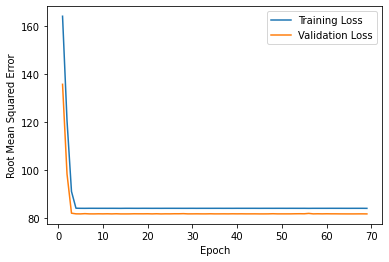

In [9]:
# The following variables are the hyperparameters.
learning_rate = 0.08
epochs = 70
batch_size = 100

# Split the original training set into a reduced training set and a
# validation set. 
validation_split = 0.2

# Identify the feature and the label.
my_feature = "median_income"    # the median income on a specific city block.
my_label = "median_house_value" # the median house value on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on the neighborhood's median income.  

# Discard any pre-existing version of the model.
my_model = None

# Shuffle the examples.
shuffled_train_df = train_df.reindex(np.random.permutation(train_df.index)) 

# Invoke the functions to build and train the model. Train on the shuffled
# training set.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, shuffled_train_df, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])

After shuffling the original training set, 
the final loss for the training set and the 
validation set become much closer.

If validation_split < 0.15,
the final loss values for the training set and
validation set diverge meaningfully.  Apparently,
the validation set no longer contains enough examples.

In [10]:
x_test = test_df[my_feature]
y_test = test_df[my_label]

results = my_model.evaluate(x_test, y_test, batch_size=batch_size)

30/30 [==============================] - 0s 378us/step - loss: 7012.3774 - root_mean_squared_error: 83.7399


Compare the root mean squared error of the model when evaluated on each of the three datasets:

training set: look for root_mean_squared_error in the final training epoch.
validation set: look for val_root_mean_squared_error in the final training epoch.
test set: run the preceding code cell and examine the root_mean_squared_error.
Ideally, the root mean squared error of all three sets should be similar.